### Project Name -  " Laptop Price Prediction " 

# 1. Problem Statement

### # Libraries Required in whole Project

In [1]:
import numpy as np
import pandas as pd

"Warnings"
import warnings
warnings.filterwarnings("ignore")

"Visualisation"
import seaborn as sns
import matplotlib.pyplot as plt

"Loading Data"
import pickle
import json

"ML - Algorithm"
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

"Model Evalution"
from sklearn.metrics import r2_score ,mean_absolute_error

"VIF"
from statsmodels.stats.outliers_influence import variance_inflation_factor


# 2. Data Gathering

Kaggle Link to Download this csv file   :___  [Link csv_link](https://www.kaggle.com/datasets/saadmo/laptop-price) 

In [2]:
"CSV file >> DF"

df = pd.read_csv("Laptop_Price.csv",index_col=["Unnamed: 0"])
df.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ssd,hdd,os,os_bit,graphic_card_gb,Touchscreen,msoffice,Price
0,ASUS,Intel,Core i3,10th,4 GB,0 GB,1024 GB,Windows,64-bit,0 GB,No,No,34649
1,Lenovo,Intel,Core i3,10th,4 GB,0 GB,1024 GB,Windows,64-bit,0 GB,No,No,38999
2,Lenovo,Intel,Core i3,10th,4 GB,0 GB,1024 GB,Windows,64-bit,0 GB,No,No,39999
3,ASUS,Intel,Core i5,10th,8 GB,512 GB,0 GB,Windows,32-bit,2 GB,No,No,69990
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,0 GB,512 GB,Windows,64-bit,0 GB,No,No,26990


## Data Understandig

In [3]:
df.sample(5)            # How data Looks
df.isna().sum()         # NaN
df.T.duplicated().sum() # col
df.duplicated().sum()   #rows
df.shape  

(823, 13)

In [4]:
# Remove duplicate Rows

df = df.drop_duplicates()
df.shape

(777, 13)

# 3. EDA ( Exploratory Data Analysis )

#### Relation Of Independent col with Target col 

<Axes: xlabel='brand', ylabel='Price'>

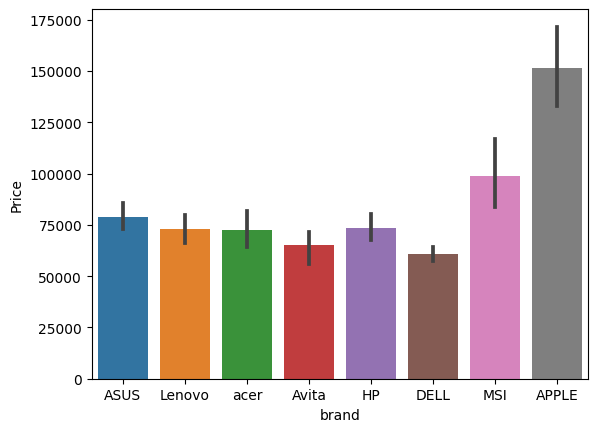

In [10]:
sns.barplot(x = df["brand"] ,y =df["Price"])

<Axes: xlabel='os', ylabel='Price'>

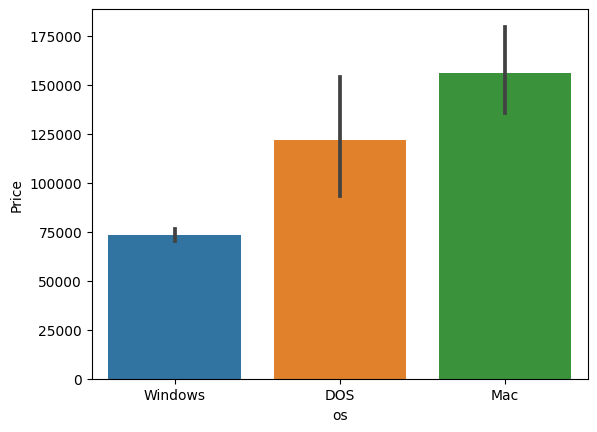

In [7]:
sns.barplot(x = df["os"] ,y =df["Price"])

<Axes: xlabel='os', ylabel='count'>

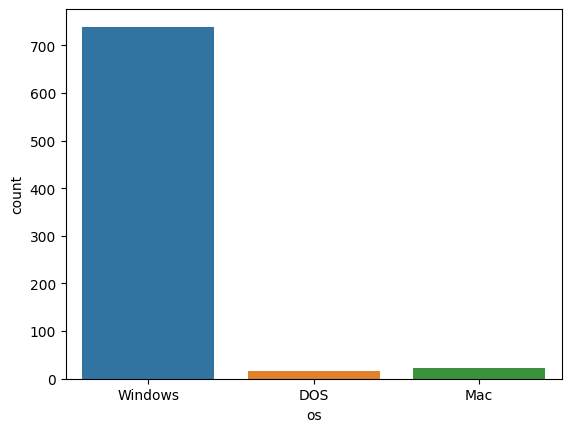

In [5]:
sns.countplot(x = df["os"])

<Axes: xlabel='brand'>

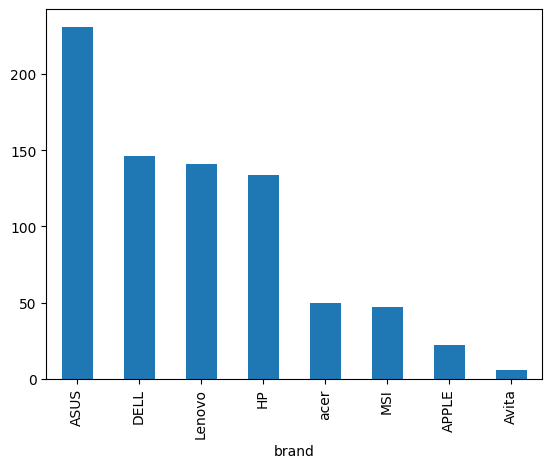

In [8]:
# Brand wise No of Laptops in Data
df["brand"].value_counts().plot(kind="bar")

<Axes: xlabel='Touchscreen', ylabel='Price'>

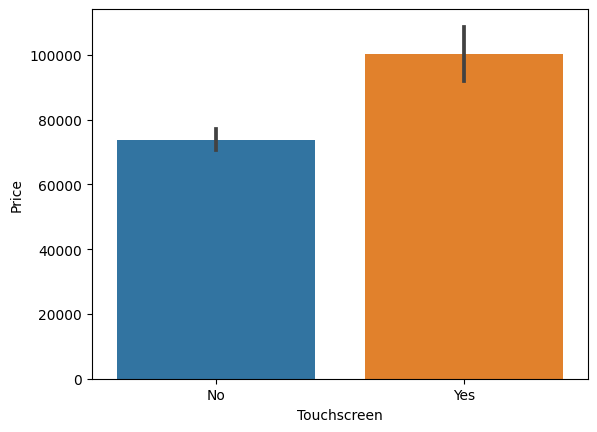

In [9]:
sns.barplot(x = df["Touchscreen"] ,y =df["Price"])

<Axes: xlabel='Touchscreen', ylabel='count'>

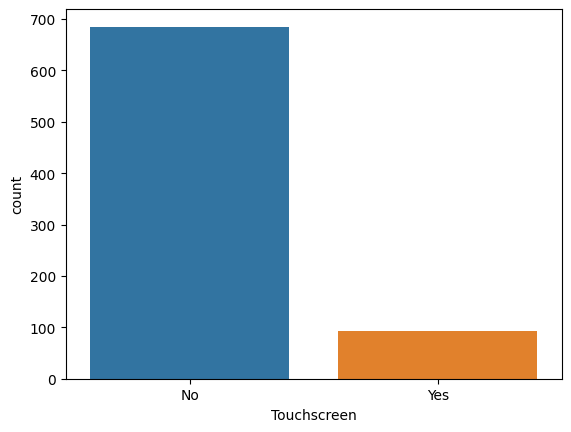

In [15]:
# Touchsreen Laptops Counts
sns.countplot(x = df["Touchscreen"])


<Axes: xlabel='Price', ylabel='Density'>

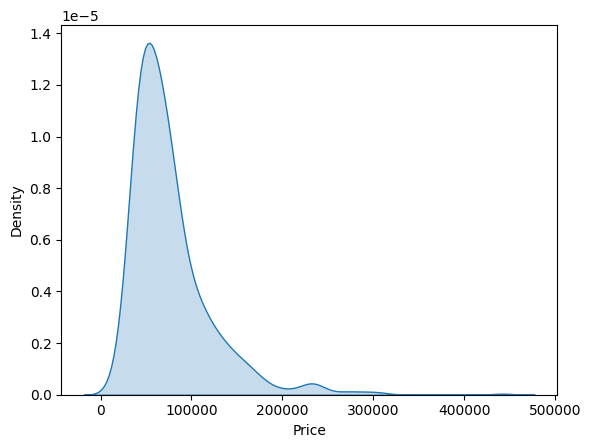

In [15]:
sns.kdeplot(df["Price"],fill=True)

<Axes: xlabel='processor_brand', ylabel='Price'>

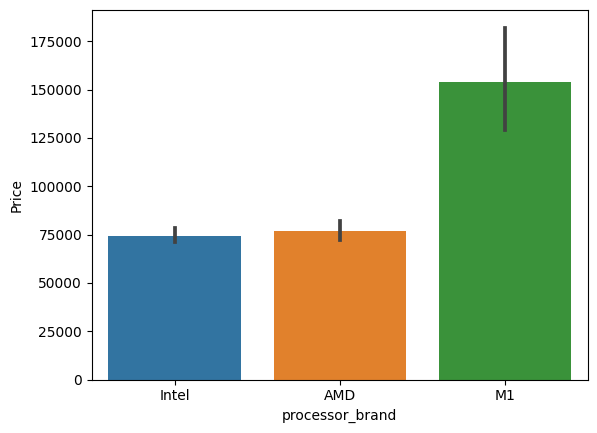

In [215]:
sns.barplot(x = df["processor_brand"] ,y =df["Price"])

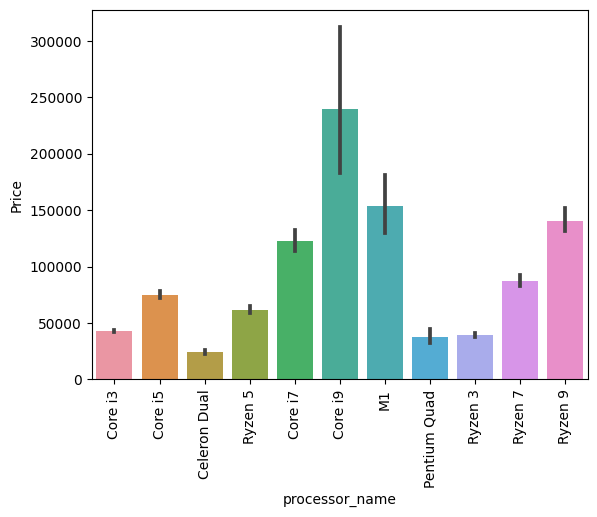

In [21]:
sns.barplot(x = df["processor_name"] ,y =df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

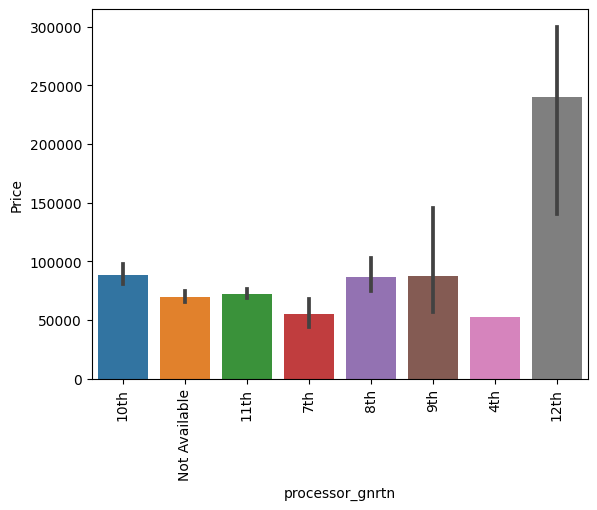

In [22]:
sns.barplot(x = df["processor_gnrtn"] ,y =df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

<Axes: xlabel='msoffice', ylabel='Price'>

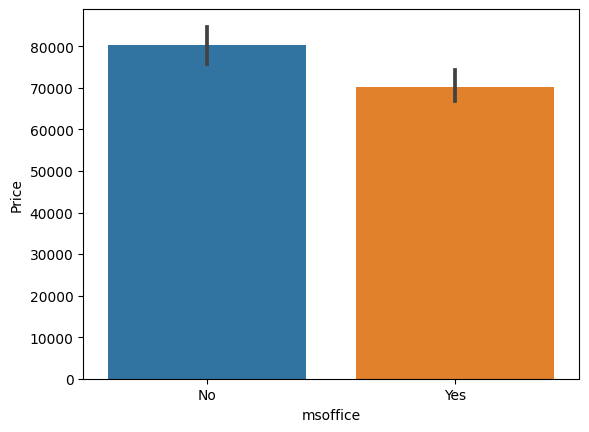

In [8]:
sns.barplot(x = df["msoffice"] ,y =df["Price"])

# 4. Feature Engineering

#### Convert Object Type  >  Numeric DataType

### 1. Label Encoding

In [12]:
df["processor_gnrtn"].value_counts()

processor_gnrtn
11th             311
Not Available    218
10th             196
8th               35
7th                7
9th                6
12th               3
4th                1
Name: count, dtype: int64

In [27]:
df["processor_gnrtn"].mode()[0]
df["processor_gnrtn"].replace({"Not Available":df["processor_gnrtn"].mode()[0]},inplace=True)
df["processor_gnrtn"].value_counts()

processor_gnrtn
11th    529
10th    196
8th      35
7th       7
9th       6
12th      3
4th       1
Name: count, dtype: int64

In [28]:
D = df 

In [29]:

# graphic_card_gb
D["graphic_card_gb"].value_counts()
D["graphic_card_gb"].replace({"0 GB":0, "4 GB":4, "2 GB":2,"6 GB":6,"8 GB":8},inplace=True)

# ram_gb
D["ram_gb"].value_counts()
D["ram_gb"].replace({"4 GB":4, "16 GB":16,"32 GB":32,"8 GB":8},inplace=True)

# hdd
D["hdd"].value_counts()
D["hdd"].replace({"0 GB":0,"1024 GB":1024,"512 GB":512,"2048 GB":2048},inplace=True)

# Touchscreen
D["Touchscreen"].value_counts()
D["Touchscreen"].replace({"Yes":1,"No":0},inplace=True)

#Processor Brand
D["processor_brand"].value_counts()
D["processor_brand"].replace({"Intel":1,"AMD":1,"M1":1.7},inplace= True)

# ssd
D["ssd"].value_counts()
D["ssd"].replace({"512 GB":512,"256 GB":256,"0 GB":0,"1024 GB":1024,"128 GB ":128,
                  "2048 GB":2048,"3072 GB":2048,"128 GB":128},inplace=True)

# Processor Name
D["processor_name"].value_counts()
D["processor_name"].replace({"Core i5":5,"Core i3":3,"Core i9":12,
                            "Ryzen 9":8,"Ryzen 3":3,"Ryzen 7":7,
                            "Core i7":7,"Ryzen 5":5,"M1":9,"Celeron Dual":2,
                            "Pentium Quad":3},inplace= True)
# OS
D["os"].replace({"Windows":1,"DOS":1,"Mac":2},inplace=True)


# OS - Bit
D["os_bit"].value_counts()
D["os_bit"].replace({"64-bit":1, "32-bit":0},inplace=True)


#msoffice
D["msoffice"].value_counts()
D["msoffice"].replace({"Yes":1,"No":0},inplace=True)



### 2. One Hot Encoding

In [30]:
D= pd.get_dummies(D,columns=["brand","processor_gnrtn"],dtype=int)

In [31]:
D.sample(5)

,processor_brand,processor_name,ram_gb,ssd,hdd,os,os_bit,graphic_card_gb,Touchscreen,msoffice,...,brand_Lenovo,brand_MSI,brand_acer,processor_gnrtn_10th,processor_gnrtn_11th,processor_gnrtn_12th,processor_gnrtn_4th,processor_gnrtn_7th,processor_gnrtn_8th,processor_gnrtn_9th
443,1.0,5,8,256,1024,1,1,4,0,0,...,0,0,0,1,0,0,0,0,0,0
610,1.7,9,8,512,0,2,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
316,1.0,5,8,512,0,1,1,4,0,1,...,0,0,0,1,0,0,0,0,0,0
614,1.7,9,16,512,0,2,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
81,1.0,3,4,256,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [18]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, 0 to 822
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   processor_brand       777 non-null    float64
 1   processor_name        777 non-null    int64  
 2   ram_gb                777 non-null    int64  
 3   ssd                   777 non-null    int64  
 4   hdd                   777 non-null    int64  
 5   os                    777 non-null    int64  
 6   os_bit                777 non-null    int64  
 7   graphic_card_gb       777 non-null    int64  
 8   Touchscreen           777 non-null    int64  
 9   msoffice              777 non-null    int64  
 10  Price                 777 non-null    int64  
 11  brand_APPLE           777 non-null    int32  
 12  brand_ASUS            777 non-null    int32  
 13  brand_Avita           777 non-null    int32  
 14  brand_DELL            777 non-null    int32  
 15  brand_HP              777 no

# 5. Feature Selection

### 1. Linearity

<Axes: >

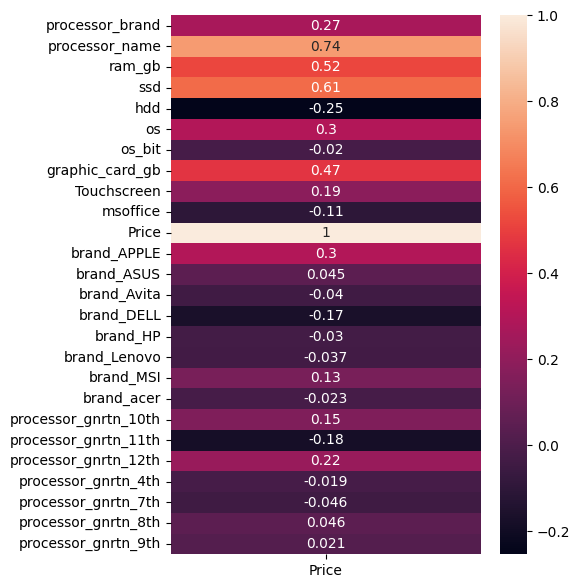

In [32]:
"Coefficient Of Correlation"

D.corr(numeric_only=True)[["Price"]]
#sns.heatmap(D.corr(),annot=True)

plt.figure(figsize = (5,7))
sns.heatmap(D.corr()[["Price"]], annot = True)

### 2. VIF ( Varience Inflution Factor)

In [33]:
x = D.drop(["Price"],axis = True)
x.shape

(777, 25)

In [34]:
vif = []

for i in range(x.shape[1]):
    vif.append(variance_inflation_factor(x,i))
    
    
"vif >> 1 to 5 "

vif  
pd.DataFrame({"VIF":vif},index = x.columns)

,VIF
processor_brand,7.674818
processor_name,2.992027
ram_gb,1.473628
ssd,3.081458
hdd,1.819197
os,inf
os_bit,1.146222
graphic_card_gb,1.618506
Touchscreen,1.135197
msoffice,1.267713


### Drop Columns

In [35]:
# Value of R is Low & VIF is High

D.drop(["msoffice","os_bit"],axis=1,inplace=True) 

### Final DF 

In [36]:

D = D.reset_index(drop = True)
D.shape

(777, 24)

In [25]:
D.sample(5)

,processor_brand,processor_name,ram_gb,ssd,hdd,os,graphic_card_gb,Touchscreen,Price,brand_APPLE,...,brand_Lenovo,brand_MSI,brand_acer,processor_gnrtn_10th,processor_gnrtn_11th,processor_gnrtn_12th,processor_gnrtn_4th,processor_gnrtn_7th,processor_gnrtn_8th,processor_gnrtn_9th
711,1.0,7,4,512,0,1,0,0,63990,0,...,0,0,0,0,1,0,0,0,0,0
286,1.0,5,8,512,0,1,0,0,71090,0,...,0,0,0,0,1,0,0,0,0,0
190,1.0,5,8,0,512,1,4,0,106167,0,...,0,0,0,1,0,0,0,0,0,0
67,1.0,3,4,256,0,1,0,0,39999,0,...,1,0,0,1,0,0,0,0,0,0
174,1.0,3,4,256,1024,1,0,0,41390,0,...,0,0,0,1,0,0,0,0,0,0


# 6. Model Training

## Split Data

In [37]:
" Seperate Input & Output Col"

x = D.drop(["Price"],axis=1)  # Input
y = D.loc[:,"Price"]          # Output


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

80 % Data to Model | 20 % keep Aside for Testing Purpose

In [40]:
x_train.shape
y_train.shape

(621,)

In [41]:
x_test.shape
y_test.shape

(156,)

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [43]:
lr.fit(x_train,y_train)

LinearRegression()

### Manual Testing on Hidden Data

In [37]:

x_test[7:10] 
"Actual Laptop Value"

y_test[1:5]  # Y_Actual

250    59999
707    64990
636    64990
203    59490
Name: Price, dtype: int64

In [38]:
y_pred[1:5].round(2)  # Y_Predict

array([64449.43, 75317.33, 77514.06, 58727.17])

### Y = MX + C

In [46]:
print("-"*70)
m = lr.coef_
print(" 'M'  Linear Coefficient (Slope) ")
print(m)
print("-"*70)
x = lr.intercept_
print(" 'C' lenier Intersept ")
print(x)
print("-"*70)

----------------------------------------------------------------------
 'M'  Linear Coefficient (Slope) 
[-6.42779892e+04  9.30394378e+03  1.25124023e+03  4.33242586e+01
  1.09359631e+01  3.77902151e+04  3.94991366e+03  2.16707234e+04
  3.77902151e+04 -2.18960894e+03 -3.15952901e+04  2.69396924e+02
  1.54659076e+03 -1.09332572e+03 -1.18843566e+03 -3.53954227e+03
  1.51055378e+03 -1.39002043e+04  4.71168061e+04 -1.22361251e+04
 -8.32210132e+03 -3.44532402e+03 -1.07236051e+04]
----------------------------------------------------------------------
 'C' lenier Intersept 
24579.157872057658
----------------------------------------------------------------------


In [72]:
y_pred = lr.predict(x_test)
y_pred_train = lr.predict(x_train)

## Manual Testing

In [71]:
y_test[5:8] # Acual Laptop Price

232    73490
416    57990
366    70190
Name: Price, dtype: int64

In [70]:
y_pred[5:8].round()  # Model Predicted Price

array([86523., 59471., 73182.])

### Normality of Residual __ Assumption

In [56]:
# Error = Ya - Yp

residual = y_train - y_pred_train
residual

7     -14241.222988
726   -17027.324384
40       208.659421
140    -5937.547165
753    47573.685376
           ...     
73     14630.427270
400     2762.415475
118   -13180.147163
701   -13599.701673
206    -9459.431428
Name: Price, Length: 621, dtype: float64

### 1 QQ Plot

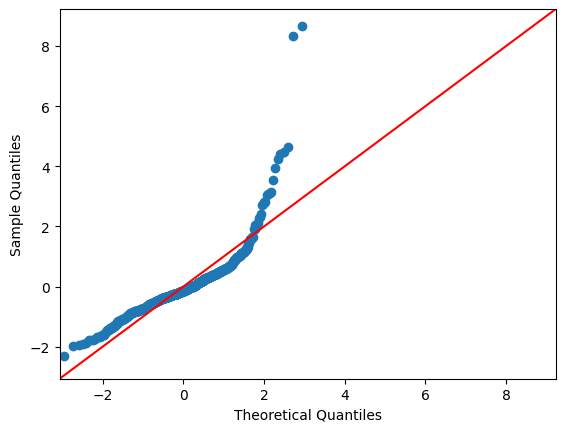

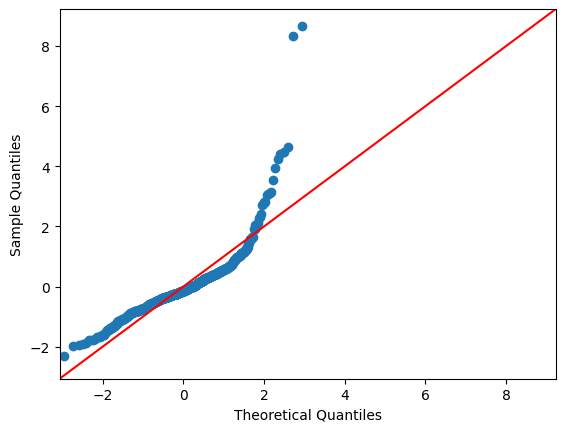

In [57]:
import statsmodels.api as sm
sm.qqplot(residual, line='45', fit = True)

### 2. Skewness

<Axes: xlabel='Price', ylabel='Density'>

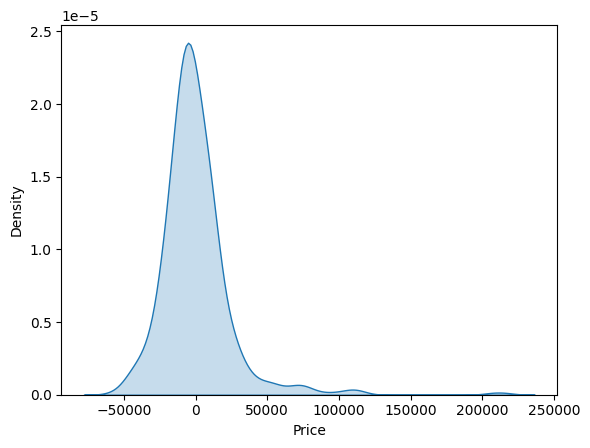

In [60]:
sns.kdeplot(residual,fill=True)

In [ ]:
Positively Skewed Data | Distribution Longer towards Right Hand Side
Mean > Median

### 3. shapiro Test

In [83]:
"P - Value"
from scipy.stats import shapiro

In [82]:
aa, P_val = shapiro(residual)
print("P Value is :", P_val)

if P_val >= 0.05:
    print("Data is normally distributed")

else:
    print("Data is not normally distributed")

P Value is : 1.9904925087269403e-27
Data is not normally distributed


### Homoscedasticity

Text(0.5, 1.0, 'Yactual Vs Residual ')

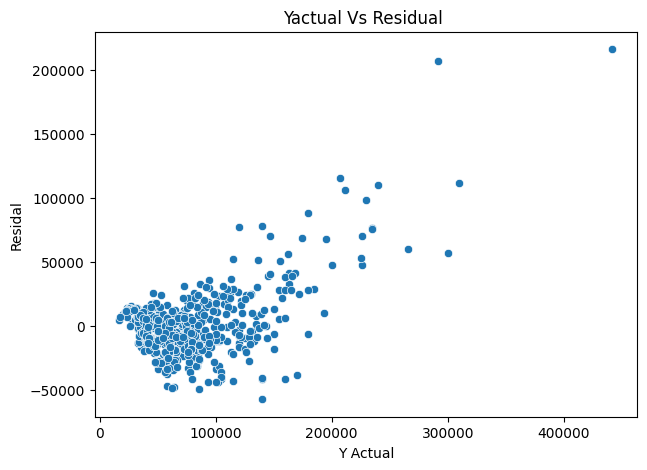

In [61]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = y_train, y = residual)
plt.xlabel('Y Actual')
plt.ylabel("Residal")
plt.title("Yactual Vs Residual ")

# Spread of Residual should be Uniform

# 7. Model Evalution

In [33]:
from sklearn.metrics import r2_score ,mean_absolute_error

### Testing Data

In [34]:
y_pred = lr.predict(x_test)

mae = mean_absolute_error(y_test,y_pred)
print("MAE :",mae)

r2 = r2_score(y_test,y_pred)
print("R-Squared Value :",(r2*100).round(2),"%")

n = x_train.shape[0]
k = x_train.shape[1]
Radj = 1 - ((1 - r2) * (n-1))/(n-k-1)
print("Adjusted R-Squared Value:",(Radj*100).round(2),"%")

MAE : 17512.378146649196
R-Squared Value : 70.41 %
Adjusted R-Squared Value: 69.26 %


### Training Data

In [56]:
y_pred_train = lr.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train)
print("MAE :",mae)

r2 = r2_score(y_train,y_pred_train)
print("R-Squared Value :",(r2*100).round(2),"%")

n = x_train.shape[0]
k = x_train.shape[1]
Radj = 1 - ((1 - r2) * (n-1))/(n-k-1)
print("Adjusted R-Squared Value:",(Radj*100).round(2))

MAE : 15665.531795184466
R-Squared Value : 69.48 %
Adjusted R-Squared Value: 68.3


## Training Data : 69.74%      |      Testing Data : 70.41 %

### Load Model

In [406]:
import pickle
import json

with open("model.pkl","wb") as s:
    pickle.dump(lr,s)

### Load Data

In [125]:
col = lr.feature_names_in_.tolist()
len(col)

23

In [44]:
# graphic_card_gb
graphic_card_gb_data = {"0 GB":0,"4 GB":4,"2 GB":2,"6 GB":6,"8 GB":8}

# ram_gb
ram_gb_data = {"4 GB":4,"16 GB":16,"32 GB":32,"8 GB":8}

# hdd
hdd = {"0 GB":0,"1024 GB":1024,"512 GB":512,"2048 GB":2048}

# ssd
ssd_data = {"512 GB":512,"256 GB":256,"0 GB":0,"1024 GB":1024,"128 GB ":128,
                  "2048 GB":2048,"3072 GB":2048,"128 GB":128}

# Processor Name

processor_name_data = {"Core i5":5,"Core i3":3,"Core i9":12,
                            "Ryzen 9":8,"Ryzen 3":3,"Ryzen 7":7,
                            "Core i7":7,"Ryzen 5":5,"M1":9,"Celeron Dual":2,
                            "Pentium Quad":3}

# Touchscreen
Touchscreen_data = {"Yes":1,"No":0}
os_data = {"Windows":1,"DOS":1,"Mac":2}

processor_brand = {"Intel":1,"AMD":1,"M1":1.7}

In [47]:
A = {"Touchscreen":Touchscreen_data,"os":os_data ,
     "processor_brand":processor_brand,"processor_name":processor_name_data , "col":col}

In [430]:
import json

with open("pro_data.json","w") as L:
    json.dump(A,L)

In [420]:
D.shape

(777, 24)

### User Input

In [73]:
processor_brand = "Intel"
processor_name = "Core i3"
ram_gb = 4
ssd = 0
hdd = 512
os = "Windows"
graphic_card_gb = 4 
Touchscreen = "No"
brand = "acer"
processor_gnrtn = "7th"

### utils.py

In [3]:

import warnings
warnings.filterwarnings("ignore")
import pickle
import json
import numpy as np
import pandas as pd

class Laptop_Price():
    def __init__(self,processor_brand,processor_name,ram_gb,ssd,hdd,os,graphic_card_gb,Touchscreen,brand,
                 processor_gnrtn):
               
        self.processor_brand =  processor_brand
        self.processor_name =  processor_name
        self.ram_gb = ram_gb
        self.ssd = ssd
        self.hdd = hdd 
        self.os = os
        self.graphic_card_gb = graphic_card_gb
        self.Touchscreen = Touchscreen
        self.brand = "brand_" + brand
        self.processor_gnrtn = "processor_gnrtn_" + processor_gnrtn
        
    def load_data(self):
        with open("model.pkl","rb") as r:
            self.model = pickle.load(r)
            
        with open("pro_data.json","r") as e:
            self.data = json.load(e)
            
    def lap_price(self):
        self.load_data()
               
         
        processor_gnrtn_index = self.data["col"].index(self.processor_gnrtn)
        brand_index = self.data["col"].index(self.brand)
       

        array = np.zeros([1,len(self.data["col"])])
        
        array[0][0] = self.data["processor_brand"][self.processor_brand]
        array[0][1] = self.data["processor_name"][self.processor_name]
        array[0][2] = self.ram_gb
        array[0][3] = self.ssd
        array[0][4] = self.hdd
        array[0][5] = self.data["os"][self.os]
        array[0][6] = self.graphic_card_gb
        array[0][7] = self.data["Touchscreen"][self.Touchscreen]
        
        array[0,brand_index] = 1
        array[0,processor_gnrtn_index] = 1
            
        print(array)
        price = self.model.predict(array)[0].round()
        return price
    
obj = Laptop_Price("Intel","Core i5",8,250,500,"Windows",2,"No","HP","4th")
obj.lap_price()

[[  1.   5.   8. 250. 500.   1.   2.   0.   0.   0.   0.   0.   1.   0.
    0.   0.   0.   0.   0.   1.   0.   0.   0.]]


68130.0